In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D



In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [13]:
img_size = 224
batch_size = 8

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    "data",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="binary",
    classes=["dry", "wet"],   # 🔥 FORCE ONLY 2 CLASSES
    subset="training"
)

val_data = datagen.flow_from_directory(
    "data",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="binary",
    classes=["dry", "wet"],   # 🔥 FORCE ONLY 2 CLASSES
    subset="validation"
)



Found 16 images belonging to 2 classes.
Found 2 images belonging to 2 classes.


In [14]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense


In [15]:
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1, activation="sigmoid")
])


In [16]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [17]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)


Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.2500 - loss: 0.9665 - val_accuracy: 1.0000 - val_loss: 0.4366
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.5625 - loss: 0.7691 - val_accuracy: 1.0000 - val_loss: 0.3755
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.6250 - loss: 0.6039 - val_accuracy: 1.0000 - val_loss: 0.3194
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.8750 - loss: 0.4797 - val_accuracy: 1.0000 - val_loss: 0.2794
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - accuracy: 0.9375 - loss: 0.3783 - val_accuracy: 1.0000 - val_loss: 0.2436


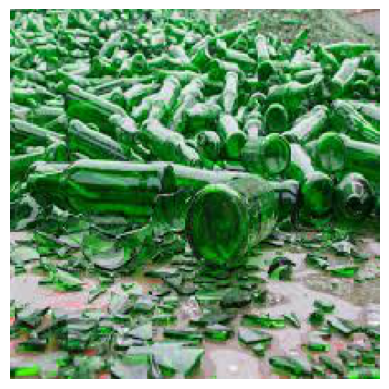

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 970ms/step
Prediction: DRY WASTE


In [18]:
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img("test.jpg", target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0
import matplotlib.pyplot as plt

plt.imshow(img)
plt.axis("off")
plt.show()


prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("Prediction: WET WASTE")
else:
    print("Prediction: DRY WASTE")


In [19]:
model.save("waste_segregation_model.h5")
